In [2]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
## Excel
import os
#import xlwt
from openpyxl import load_workbook
## Data process
from scipy.interpolate import interp1d #Interpolation
from scipy.signal import savgol_filter #Smooth

path = r"Neutron_response2.xlsx"
book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

data_pd=pd.read_excel(writer, sheet_name = 'sheet2', index_col=None,header=0)
#沒有index_column(index_col=None) 但有一列標題(header=0)

#轉成array 矩陣

data = data_pd.values

#確認輸入是否正確
print(data.shape)
print(data)

p =pd.to_numeric(data_pd.iloc[:, 0], errors='coerce').fillna(0)

print(p.values)

d=np.round(p.values,2)
print(d)

In [7]:
Neutron_response_05MeV = np.loadtxt("1113_EJ309_neutron_trS_response_0.5MeV_Lightoutput_runtotal.txt")
Neutron_response_1MeV  = np.loadtxt("1113_EJ309_neutron_trS_response_1.0MeV_Lightoutput_runtotal.txt")
Neutron_response_15MeV = np.loadtxt("1113_EJ309_neutron_trS_response_1.5MeV_Lightoutput_runtotal.txt")
Neutron_response_2MeV  = np.loadtxt("1113_EJ309_neutron_trS_response_2.0MeV_Lightoutput_runtotal.txt")
Neutron_response_25MeV = np.loadtxt("1113_EJ309_neutron_trS_response_2.5MeV_Lightoutput_runtotal.txt")
Neutron_response_3MeV  = np.loadtxt("1113_EJ309_neutron_trS_response_3.0MeV_Lightoutput_runtotal.txt")
Neutron_response_35MeV = np.loadtxt("1113_EJ309_neutron_trS_response_3.5MeV_Lightoutput_runtotal.txt")
Neutron_response_4MeV  = np.loadtxt("1113_EJ309_neutron_trS_response_4.0MeV_Lightoutput_runtotal.txt")
Neutron_response_45MeV = np.loadtxt("1113_EJ309_neutron_trS_response_4.5MeV_Lightoutput_runtotal.txt")
Neutron_response_5MeV  = np.loadtxt("1113_EJ309_neutron_trS_response_5.0MeV_Lightoutput_runtotal.txt")

In [8]:
n=2
N_response_05MeV_binned=np.round(Neutron_response_05MeV,n)
N_response_1MeV_binned =np.round(Neutron_response_1MeV ,n)
N_response_15MeV_binned=np.round(Neutron_response_15MeV,n)
N_response_2MeV_binned =np.round(Neutron_response_2MeV ,n)
N_response_25MeV_binned=np.round(Neutron_response_25MeV,n)
N_response_3MeV_binned =np.round(Neutron_response_3MeV ,n)
N_response_35MeV_binned=np.round(Neutron_response_35MeV,n)
N_response_4MeV_binned =np.round(Neutron_response_4MeV ,n)
N_response_45MeV_binned=np.round(Neutron_response_45MeV,n)
N_response_5MeV_binned =np.round(Neutron_response_5MeV ,n)


In [9]:
N_res_05MeV, N_res_05MeV_counts = np.unique(N_response_05MeV_binned, return_counts=True)
N_res_1MeV, N_res_1MeV_counts   = np.unique(N_response_1MeV_binned , return_counts=True)
N_res_15MeV, N_res_15MeV_counts = np.unique(N_response_15MeV_binned, return_counts=True)
N_res_2MeV, N_res_2MeV_counts   = np.unique(N_response_2MeV_binned , return_counts=True)
N_res_25MeV, N_res_25MeV_counts = np.unique(N_response_25MeV_binned, return_counts=True)
N_res_3MeV, N_res_3MeV_counts   = np.unique(N_response_3MeV_binned , return_counts=True)
N_res_35MeV, N_res_35MeV_counts = np.unique(N_response_35MeV_binned, return_counts=True)
N_res_4MeV, N_res_4MeV_counts   = np.unique(N_response_4MeV_binned , return_counts=True)
N_res_45MeV, N_res_45MeV_counts = np.unique(N_response_45MeV_binned, return_counts=True)
N_res_5MeV, N_res_5MeV_counts   = np.unique(N_response_5MeV_binned , return_counts=True)



#print(uniqw, unique_counts )
#print(len(unique_counts))

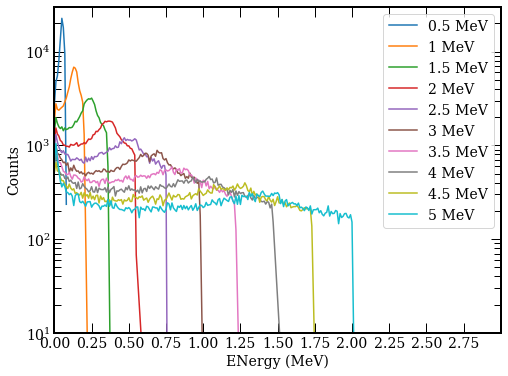

In [10]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(N_res_05MeV, N_res_05MeV_counts ,label='0.5 MeV' )
plt.plot(N_res_1MeV, N_res_1MeV_counts   ,label='1 MeV')
plt.plot(N_res_15MeV, N_res_15MeV_counts ,label='1.5 MeV')
plt.plot(N_res_2MeV, N_res_2MeV_counts   ,label='2 MeV')
plt.plot(N_res_25MeV, N_res_25MeV_counts ,label='2.5 MeV')
plt.plot(N_res_3MeV, N_res_3MeV_counts   ,label='3 MeV')
plt.plot(N_res_35MeV, N_res_35MeV_counts ,label='3.5 MeV')
plt.plot(N_res_4MeV, N_res_4MeV_counts   ,label='4 MeV')
plt.plot(N_res_45MeV, N_res_45MeV_counts ,label='4.5 MeV')
plt.plot(N_res_5MeV, N_res_5MeV_counts   ,label='5 MeV')

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線
ax.set_xlabel('ENergy (MeV)',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
ax.set_ylim(10,30000)
ax.set_xlim(0,3)
ax.set_xticks(np.arange(0,3,0.25))
plt.yscale("log")
#ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True) # y軸改為科學記號表示
plt.legend(fontsize=14)

In [11]:
new_X= np.linspace(0, 5, num=501, endpoint=True)
interpolation_func_res_05MeV_counts = interp1d(N_res_05MeV, N_res_05MeV_counts ,fill_value="extrapolate")
interpolation_func_res_1MeV_counts  = interp1d(N_res_1MeV,  N_res_1MeV_counts   ,fill_value="extrapolate")
interpolation_func_res_15MeV_counts = interp1d(N_res_15MeV, N_res_15MeV_counts ,fill_value="extrapolate")
interpolation_func_res_2MeV_counts  = interp1d(N_res_2MeV,  N_res_2MeV_counts   ,fill_value="extrapolate")
interpolation_func_res_25MeV_counts = interp1d(N_res_25MeV, N_res_25MeV_counts ,fill_value="extrapolate")
interpolation_func_res_3MeV_counts  = interp1d(N_res_3MeV,  N_res_3MeV_counts   ,fill_value="extrapolate")
interpolation_func_res_35MeV_counts = interp1d(N_res_35MeV, N_res_35MeV_counts ,fill_value="extrapolate")
interpolation_func_res_4MeV_counts  = interp1d(N_res_4MeV,  N_res_4MeV_counts   ,fill_value="extrapolate")
interpolation_func_res_45MeV_counts = interp1d(N_res_45MeV, N_res_45MeV_counts ,fill_value="extrapolate")
interpolation_func_res_5MeV_counts  = interp1d(N_res_5MeV,  N_res_5MeV_counts   ,fill_value="extrapolate")


res_05MeV_counts=interpolation_func_res_05MeV_counts(new_X) 
res_1MeV_counts =interpolation_func_res_1MeV_counts (new_X) 
res_15MeV_counts=interpolation_func_res_15MeV_counts(new_X) 
res_2MeV_counts =interpolation_func_res_2MeV_counts (new_X) 
res_25MeV_counts=interpolation_func_res_25MeV_counts(new_X) 
res_3MeV_counts =interpolation_func_res_3MeV_counts (new_X) 
res_35MeV_counts=interpolation_func_res_35MeV_counts(new_X) 
res_4MeV_counts =interpolation_func_res_4MeV_counts (new_X) 
res_45MeV_counts=interpolation_func_res_45MeV_counts(new_X) 
res_5MeV_counts =interpolation_func_res_5MeV_counts (new_X) 


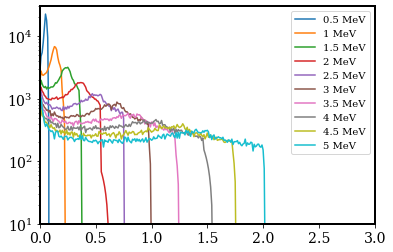

In [12]:
plt.plot(new_X, res_05MeV_counts ,label='0.5 MeV' )
plt.plot(new_X, res_1MeV_counts    ,label='1 MeV')
plt.plot(new_X, res_15MeV_counts ,label='1.5 MeV')
plt.plot(new_X, res_2MeV_counts    ,label='2 MeV')
plt.plot(new_X, res_25MeV_counts ,label='2.5 MeV')
plt.plot(new_X, res_3MeV_counts    ,label='3 MeV')
plt.plot(new_X, res_35MeV_counts ,label='3.5 MeV')
plt.plot(new_X, res_4MeV_counts    ,label='4 MeV')
plt.plot(new_X, res_45MeV_counts ,label='4.5 MeV')
plt.plot(new_X, res_5MeV_counts    ,label='5 MeV')
plt.ylim(10.,30000)
plt.xlim(0,3)
plt.yscale("log")
plt.legend()

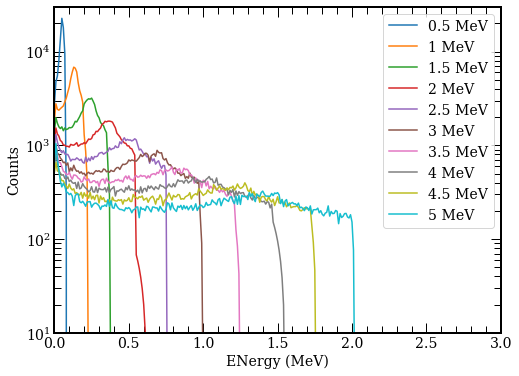

In [13]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(new_X, res_05MeV_counts ,label='0.5 MeV' )
plt.plot(new_X, res_1MeV_counts    ,label='1 MeV')
plt.plot(new_X, res_15MeV_counts ,label='1.5 MeV')
plt.plot(new_X, res_2MeV_counts    ,label='2 MeV')
plt.plot(new_X, res_25MeV_counts ,label='2.5 MeV')
plt.plot(new_X, res_3MeV_counts    ,label='3 MeV')
plt.plot(new_X, res_35MeV_counts ,label='3.5 MeV')
plt.plot(new_X, res_4MeV_counts    ,label='4 MeV')
plt.plot(new_X, res_45MeV_counts ,label='4.5 MeV')
plt.plot(new_X, res_5MeV_counts    ,label='5 MeV')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('ENergy (MeV)',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.ylim(10.,30000)
plt.xlim(0,3)
#ax.set_xticks(np.arange(0,3.1,0.5))
plt.yscale("log")
#ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True) # y軸改為科學記號表示
plt.legend(fontsize=14)

In [19]:
def gaussian(x, A,x0,sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
def GEB_fit_improve(E,osc,x,alpha,beta,gamma):
    Gaussian_distribution = np.zeros(len(x))
    for E_i,osc_i in zip(E,osc):
        FWHM = alpha+beta*((E_i+gamma*E_i**2)**0.5)
        sigma =  FWHM/2.355
        Gaussian_distribution_temp = gaussian(x,osc_i,E_i,sigma)
        Gaussian_distribution+= Gaussian_distribution_temp
    return Gaussian_distribution

In [9]:
def GEB(E,osc,x,alpha,beta,gamma):
    gE_r=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            #
            #sigma =  FWHM/2.355
            if os <= 0:
                os = 0
            FWHM = alpha+beta*((Ej+gamma*(Ej**2))**0.5)
            #FWHM= ((alpha*Ej)**2+(beta**2)*Ej+gamma**2 )**0.5
            sigma =  FWHM/2.355
            tot+=os*np.exp(-(((((Ej-Ei))/(sigma))**2)))
        gE_r.append(tot) 
    gE=np.array(gE_r)
    return gE

In [10]:
def Energy_resolution(E,osc,x,alpha,beta,gamma):
    gE_r=[]
    for Ei in x:
        tot=0
        for Ej,os in zip(E,osc):
            #FWHM = alpha+beta*((Ej+gamma*(Ej**2))**0.5)
            #sigma =  FWHM/2.355
            if os <= 0:
                os = 0

            FWHM= ((alpha*Ej)**2+(beta**2)*Ej+gamma**2 )**0.5
            sigma =  FWHM/2.355
            tot+=os*np.exp(-(((((Ej-Ei))/(sigma))**2)))
        gE_r.append(tot) 
    gE=np.array(gE_r)
    return gE

new_data_intensity_smoothed = signal.savgol_filter(new_data_intensity, 1001, 3) 

plt.plot(new_X,new_data_intensity_smoothed)

Ej=0.1
FWHM = alpha1+beta1*((Ej+gamma1*(Ej**2))**0.5)

E_re= ((alpha1*Ej)**2+(beta1**2)*Ej+gamma1**2 )**0.5

print(FWHM,E_re)

from __future__ import print_function, division
from PyAstronomy import pyasl
FWHM= ((alpha*Ej)**2+(beta**2)*Ej+gamma**2 )**0.5
pyasl.instrBroadGaussFast(new_X[1:],res_5MeV_counts[1:], FWHM, edgeHandling=None, maxsig=None)

In [16]:
# GEB parameter
alpha1=0.113
beta1=0.065
gamma1=0.06

In [20]:
GEB_5= GEB_fit_improve(new_X,res_5MeV_counts ,new_X,alpha1,beta1,gamma1)
#E_r_5=Energy_resolution(new_X[1:],res_5MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)

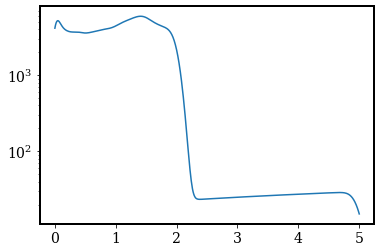

In [21]:
plt.plot(new_X, GEB_5   ,label='5 MeV')
#plt.plot(new_X, E_r_5   ,label='5 MeV')
plt.yscale("log")


In [22]:


GEB_05=GEB_fit_improve(new_X[1:],res_05MeV_counts[1:],new_X,alpha1,beta1,gamma1)
print("OK")
GEB_1= GEB_fit_improve(new_X[1:],res_1MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)
GEB_15=GEB_fit_improve(new_X[1:],res_15MeV_counts[1:],new_X,alpha1,beta1,gamma1)
GEB_2= GEB_fit_improve(new_X[1:],res_2MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)
GEB_25=GEB_fit_improve(new_X[1:],res_25MeV_counts[1:],new_X,alpha1,beta1,gamma1)
GEB_3= GEB_fit_improve(new_X[1:],res_3MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)
GEB_35=GEB_fit_improve(new_X[1:],res_35MeV_counts[1:],new_X,alpha1,beta1,gamma1)
GEB_4= GEB_fit_improve(new_X[1:],res_4MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)
GEB_45=GEB_fit_improve(new_X[1:],res_45MeV_counts[1:],new_X,alpha1,beta1,gamma1)
GEB_5= GEB_fit_improve(new_X[1:],res_5MeV_counts[1:] ,new_X,alpha1,beta1,gamma1)


OK


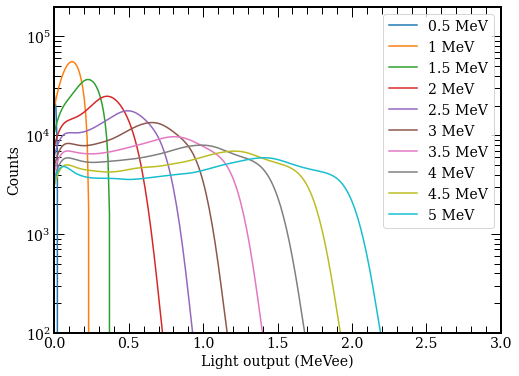

In [23]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(new_X, GEB_05 ,label='0.5 MeV' )
plt.plot(new_X, GEB_1   ,label='1 MeV')
plt.plot(new_X, GEB_15 ,label='1.5 MeV')
plt.plot(new_X, GEB_2   ,label='2 MeV')
plt.plot(new_X, GEB_25 ,label='2.5 MeV')
plt.plot(new_X, GEB_3   ,label='3 MeV')
plt.plot(new_X, GEB_35 ,label='3.5 MeV')
plt.plot(new_X, GEB_4   ,label='4 MeV')
plt.plot(new_X, GEB_45 ,label='4.5 MeV')
plt.plot(new_X, GEB_5   ,label='5 MeV')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('Light output (MeVee)',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.ylim(100.,200000)
plt.xlim(0,3)
#ax.set_xticks(np.arange(0,3.1,0.5))
plt.yscale("log")
#ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True) # y軸改為科學記號表示
plt.legend(fontsize=14)

In [31]:
new_X_0001MeVee= np.arange(0,5,0.001)
print(new_X_0001MeVee)

[0.000e+00 1.000e-03 2.000e-03 ... 4.997e+00 4.998e+00 4.999e+00]


In [35]:
interpolated_func_05 = interp1d(new_X, GEB_05,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_1  = interp1d(new_X, GEB_1 ,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_15 = interp1d(new_X, GEB_15,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_2  = interp1d(new_X, GEB_2 ,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_25 = interp1d(new_X, GEB_25,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_3  = interp1d(new_X, GEB_3 ,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_35 = interp1d(new_X, GEB_35,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_4  = interp1d(new_X, GEB_4 ,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_45 = interp1d(new_X, GEB_45,fill_value="extrapolate")(new_X_0001MeVee) 
interpolated_func_5  = interp1d(new_X, GEB_5 ,fill_value="extrapolate")(new_X_0001MeVee) 


In [91]:
import xlwt
from openpyxl import load_workbook

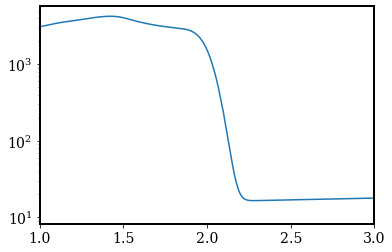

In [44]:
plt.plot(new_X_0001MeVee,interpolated_func_5)
plt.xlim(1,3)
plt.yscale("log")

In [92]:
empty =  pd.DataFrame([]) #empty dataframe for 
writer = pd.ExcelWriter('neutron_response.xlsx', engine = 'xlsxwriter') #Create New workbook
empty .to_excel(writer, sheet_name = 'empty')   #Create a empty sheet
writer.save()  #儲存

In [38]:
r_new_X= new_X_0001MeVee[:,np.newaxis]
r_GEB_05 = interpolated_func_05[:,np.newaxis]
r_GEB_1  = interpolated_func_1 [:,np.newaxis]
r_GEB_15 = interpolated_func_15[:,np.newaxis]
r_GEB_2  = interpolated_func_2 [:,np.newaxis]
r_GEB_25 = interpolated_func_25[:,np.newaxis]
r_GEB_3  = interpolated_func_3 [:,np.newaxis]
r_GEB_35 = interpolated_func_35[:,np.newaxis]
r_GEB_4  = interpolated_func_4 [:,np.newaxis]
r_GEB_45 = interpolated_func_45[:,np.newaxis]
r_GEB_5  = interpolated_func_5 [:,np.newaxis]
AB=np.column_stack((r_new_X,r_GEB_05,r_GEB_1,r_GEB_15
,r_GEB_2 
,r_GEB_25
,r_GEB_3 
,r_GEB_35
,r_GEB_4 
,r_GEB_45
,r_GEB_5 ))
print(AB)

[[0.00000000e+00 3.98515809e+04 1.15025701e+04 ... 2.57979131e+03
  2.22163846e+03 2.68840531e+03]
 [1.00000000e-03 4.09437968e+04 1.18047293e+04 ... 2.63317913e+03
  2.26819148e+03 2.73529071e+03]
 [2.00000000e-03 4.20360128e+04 1.21068885e+04 ... 2.68656695e+03
  2.31474451e+03 2.78217612e+03]
 ...
 [4.99700000e+00 0.00000000e+00 0.00000000e+00 ... 1.11824943e+01
  1.11824943e+01 1.11824943e+01]
 [4.99800000e+00 0.00000000e+00 0.00000000e+00 ... 1.10839709e+01
  1.10839709e+01 1.10839709e+01]
 [4.99900000e+00 0.00000000e+00 0.00000000e+00 ... 1.09854475e+01
  1.09854475e+01 1.09854475e+01]]


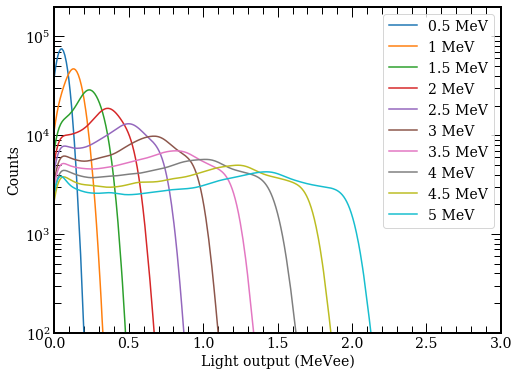

In [46]:
# plt.rc 指令要放在最前面
plt.rc('font', family='serif')         # 自型
plt.rc('xtick', labelsize=14)          # X軸數字的文字大小
plt.rc('ytick', labelsize=14)          # Y軸數字的文字大小
plt.rcParams['axes.linewidth'] = 2     # 設置外框的寬度

fig = plt.figure(figsize=(8,6))        # 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(AB[:,0], AB[:,1] ,label='0.5 MeV' )
plt.plot(AB[:,0], AB[:,2]  ,label='1 MeV')
plt.plot(AB[:,0], AB[:,3] ,label='1.5 MeV')
plt.plot(AB[:,0], AB[:,4]  ,label='2 MeV')
plt.plot(AB[:,0], AB[:,5] ,label='2.5 MeV')
plt.plot(AB[:,0], AB[:,6]  ,label='3 MeV')
plt.plot(AB[:,0], AB[:,7] ,label='3.5 MeV')
plt.plot(AB[:,0], AB[:,8]  ,label='4 MeV')
plt.plot(AB[:,0], AB[:,9] ,label='4.5 MeV')
plt.plot(AB[:,0], AB[:,10]   ,label='5 MeV')

ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))    # x軸主格線的'寬度'(ex: 每10畫一個主格線)
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))     # x軸副格線的'寬度'(ex: 每5畫一個副格線)

ax.xaxis.set_tick_params(which='major', size=10, width=1, direction='in', top='on')    # x軸主要格線
ax.xaxis.set_tick_params(which='minor', size=7, width=1, direction='in', top='on')     # x軸次要格線
ax.yaxis.set_tick_params(which='major', size=10, width=1, direction='in', right='on')   # y軸主要格線
ax.yaxis.set_tick_params(which='minor', size=7, width=1, direction='in', right='on')   # y軸次要格線

ax.set_xlabel('Light output (MeVee)',fontsize=14)
ax.set_ylabel('Counts',fontsize=14)
plt.ylim(100.,200000)
plt.xlim(0,3)
#ax.set_xticks(np.arange(0,3.1,0.5))
plt.yscale("log")
#ax.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True) # y軸改為科學記號表示
plt.legend(fontsize=14)

In [39]:
Data_pd = pd.DataFrame(AB ) #Transfer the data format from numpy to pandas dataframe

path = r'neutron_response.xlsx' #choose a excel file and should be created before

book = load_workbook(path)
writer = pd.ExcelWriter(path, engine = 'openpyxl')
writer.book = book

Data_pd .to_excel(writer, sheet_name = 'GEB_0.001MeV_corrected', index=False) 
# write the data to the certain sheet index=False 沒有左手邊直行(index_column)
writer.save() 
writer.close() #last two commands are important

In [6]:
from collections import Counter
w = np.array([0.1, 0.2, 0.1, 0.3, 0.5])
uniqw, inverse = np.unique(w, return_inverse=True)

In [8]:
print(uniqw)
print(np.bincount(inverse))

[0.1 0.2 0.3 0.5]
[2 1 1 1]


In [24]:
print(type(p))

<class 'numpy.ndarray'>


In [ ]:
d=np.set_printoptions(formatter={'float': "{0:0.2e}".format})

In [8]:
p=data_pd.astype(np.float, copy=True, errors='raise')
print(p)
d=np.round(p.values,2)
print(d)

ValueError: could not convert string to float: '0.9193630.930135'

In [10]:
d=np.round(p.values,2)
print(d)

TypeError: can't multiply sequence by non-int of type 'float'

In [4]:
p=data[:,0]
y = p.astype(np.float,copy=True,errors='ignore')
print(y)
d=np.round(p,2)
print(d)

TypeError: 'errors' is an invalid keyword argument for astype()